<a href="https://colab.research.google.com/github/Siddhu290/Machine_Learning/blob/main/2024-08-02/Linear_regression_using__keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Neural Network**

##**Neural Network Perspective and terminology**:
   How ever we csn also solve the problem iteratively using a nummerical technique called **gradiant decent** which is the baies for how neural network are trainned.

In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [31]:
type(boston_housing)

module

In [32]:
SEED_VALUE = 42

# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [33]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [34]:
boston_features = {
    'Average Number of Rooms':5,
}

X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features['Average Number of Rooms']]

(404,)


In [35]:
y_train.shape

(404,)

In [36]:
X_test.shape

(102, 13)

In [37]:
X_train_1d

array([6.142, 7.61 , 4.97 , 6.037, 6.376, 5.708, 5.536, 5.468, 5.628,
       5.019, 6.404, 4.628, 5.572, 6.251, 5.613, 5.957, 7.016, 6.345,
       6.162, 6.727, 6.202, 6.595, 7.135, 6.575, 5.895, 6.794, 6.012,
       7.185, 5.813, 5.569, 6.315, 6.297, 6.301, 5.935, 7.024, 6.415,
       5.599, 5.701, 6.041, 6.279, 5.454, 6.211, 6.316, 6.411, 5.887,
       5.924, 5.822, 6.674, 6.842, 5.713, 5.968, 6.461, 7.358, 6.565,
       5.88 , 5.87 , 6.348, 6.193, 6.854, 6.546, 6.004, 6.538, 6.185,
       5.836, 6.525, 6.436, 5.757, 5.818, 5.852, 5.404, 5.682, 6.629,
       7.178, 5.914, 6.096, 5.631, 5.896, 5.637, 5.966, 5.403, 6.678,
       7.47 , 5.456, 6.453, 6.372, 6.31 , 6.405, 7.853, 4.926, 6.103,
       6.75 , 8.034, 6.009, 7.765, 8.069, 6.358, 6.975, 6.015, 6.8  ,
       6.43 , 7.645, 8.337, 6.113, 6.77 , 5.757, 6.487, 6.162, 6.069,
       5.565, 5.96 , 6.229, 7.929, 6.715, 5.39 , 6.383, 7.147, 6.006,
       6.004, 5.928, 5.936, 6.315, 5.727, 6.152, 7.454, 6.968, 5.95 ,
       6.232, 6.951,

In [38]:
X_test_1d

array([6.434, 5.913, 5.985, 6.25 , 6.121, 5.926, 6.874, 6.167, 5.961,
       6.437, 6.405, 6.072, 6.151, 7.831, 5.648, 6.108, 6.417, 6.144,
       6.114, 6.127, 5.304, 5.837, 5.841, 5.605, 5.876, 6.242, 6.879,
       6.728, 6.38 , 5.878, 6.176, 6.833, 6.826, 6.245, 5.713, 5.   ,
       5.597, 5.877, 5.983, 6.635, 7.104, 6.625, 6.185, 7.686, 6.563,
       6.153, 6.616, 5.782, 6.513, 6.182, 7.249, 5.79 , 5.036, 5.813,
       7.185, 6.63 , 6.343, 8.297, 6.758, 6.421, 6.98 , 6.471, 6.852,
       6.019, 6.376, 6.108, 6.417, 6.209, 5.093, 5.987, 6.395, 6.957,
       6.229, 5.414, 6.495, 6.009, 5.885, 6.375, 6.968, 4.88 , 5.981,
       7.52 , 5.593, 6.485, 5.705, 6.172, 6.229, 5.951, 6.593, 7.061,
       6.03 , 5.884, 6.897, 8.259, 6.812, 6.122, 7.333, 8.78 , 6.273,
       7.802, 6.951, 6.101])

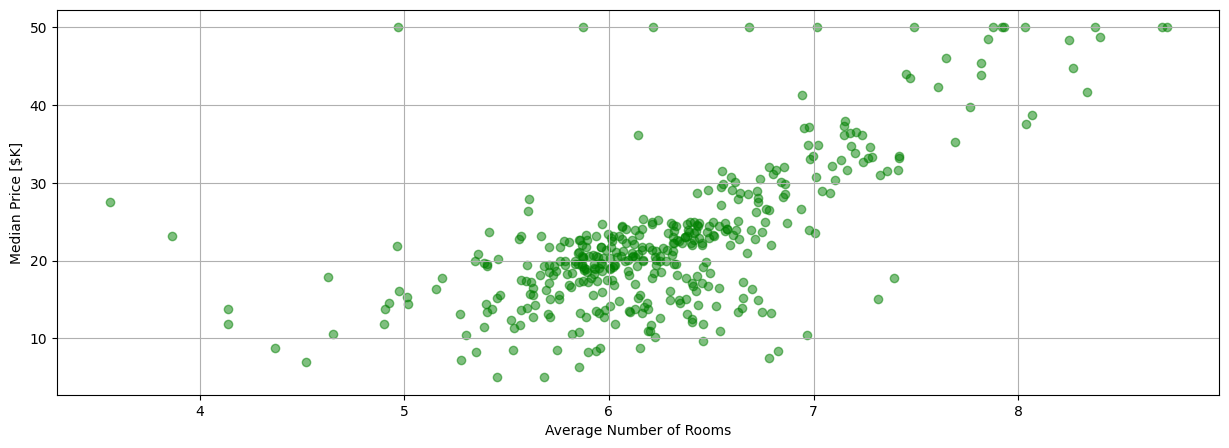

In [39]:
plt.figure(figsize=(15, 5))

plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color='green', alpha=0.5);

In [40]:
model = Sequential()

# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))

# Display a summary of the model architecture.
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.005), # Use learning_rate instead of lr
              loss='mse')

In [42]:
history = model.fit(X_train_1d,
                    y_train,
                    batch_size=16,
                    epochs=101,
                    validation_split=0.3)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 306.5513 - val_loss: 395.7602
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 281.4619 - val_loss: 372.7426
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 262.4064 - val_loss: 351.3003
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 244.5801 - val_loss: 330.8013
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 227.6255 - val_loss: 311.1571
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 211.4911 - val_loss: 292.3538
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 196.1675 - val_loss: 274.3882
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 181.6514 - val_loss: 257.2587
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 167.9402 - val_loss: 240.9640
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 155.0311 - val_loss: 225.5025
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 142.9208 - val_loss: 210.8721
Epoch 12/101
18/18

In [43]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)


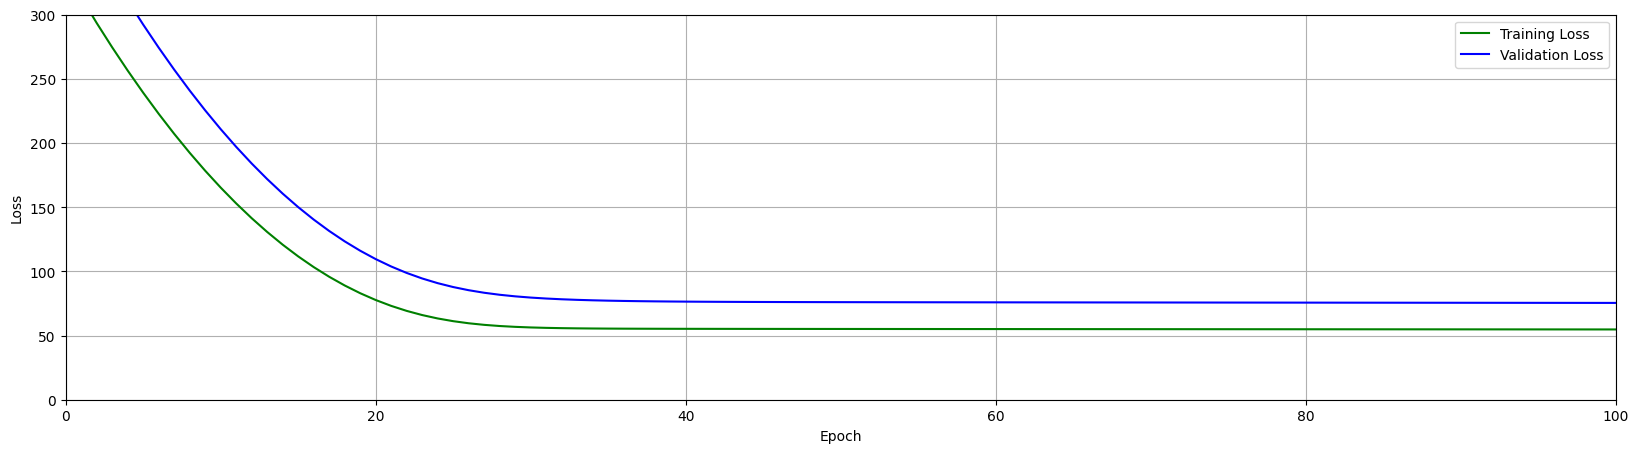

In [44]:
plot_loss(history)


In [45]:
import numpy as np

# Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x = np.array([3, 4, 5, 6, 7]).reshape(-1, 1)
y_pred = model.predict(x)
for idx in range(len(x)):
    print("Predicted price of a home with {} rooms: ${}K".format(x[idx][0], int(y_pred[idx]*10)/10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted price of a home with 3 rooms: $11.5K
Predicted price of a home with 4 rooms: $14.7K
Predicted price of a home with 5 rooms: $18.0K
Predicted price of a home with 6 rooms: $21.3K
Predicted price of a home with 7 rooms: $24.6K


<ipython-input-45-087cf22a45e1>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted price of a home with {} rooms: ${}K".format(x[idx][0], int(y_pred[idx]*10)/10))


In [46]:
# Generate feature data that spans the range of interest for the independent variable.
x = tf.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [47]:
def plot_data(x_data, y_data, x, y, title=None):

    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

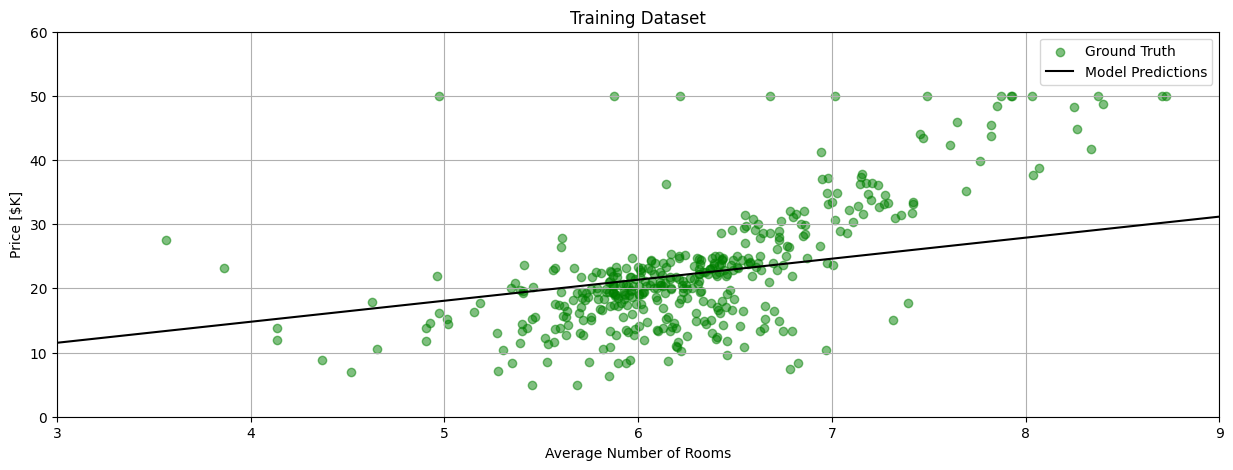

In [48]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')


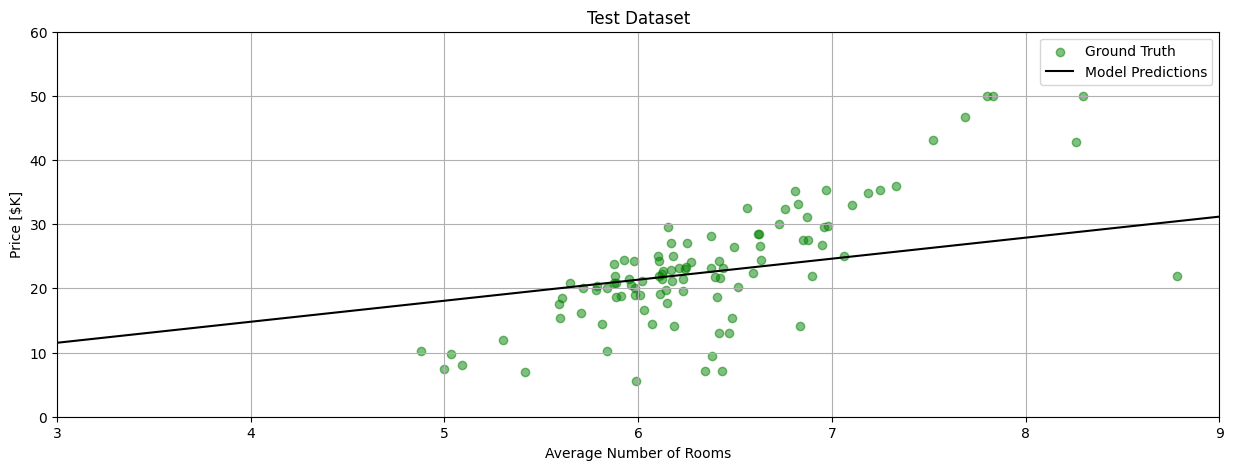

In [49]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')
